In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

In [4]:
data = pd.read_csv("POP.csv")
poblacion = data["value"].values.reshape(-1, 1)

In [6]:
#Normalización
scaler = MinMaxScaler()
poblacion_normalizada = scaler.fit_transform(poblacion)

# Crear ventanas temporales
def crear_ventanas(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

window_size = 5
X, y = crear_ventanas(poblacion_normalizada, window_size)

In [7]:
model = Sequential([
    LSTM(50, activation='relu', input_shape=(window_size, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,355 (122.48 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,904 (81.66 KB)

In [8]:
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.2007 - val_loss: 0.4783
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0816 - val_loss: 0.0854
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0083 - val_loss: 2.2799e-04
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.9076e-04 - val_loss: 0.0056
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7232e-04 - val_loss: 0.0020
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0153e-04 - val_loss: 0.0020
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.5803e-05 - val_loss: 0.0013
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.2888e-05 - val_loss: 8.5676e-04
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.7510e-06 - val_loss: 6.7036e-04
Epoch 10/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.9695e-06 - val_loss: 5.7801e-04
Epoch 11/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.5918e-06 - val_loss: 5.3010e-04
Epoch 12/1

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


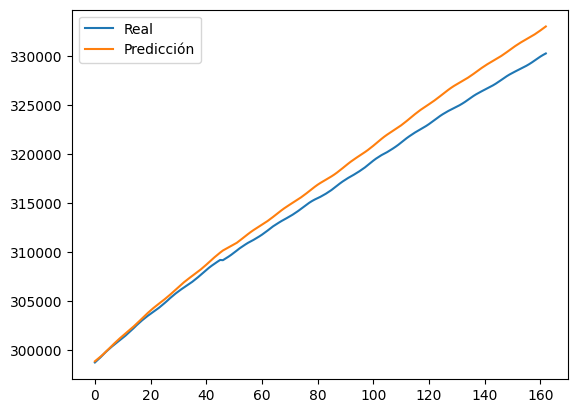

In [9]:
# Predicción
y_pred = model.predict(X_test)

# Invertir normalización
y_test_real = scaler.inverse_transform(y_test)
y_pred_real = scaler.inverse_transform(y_pred)

# Gráfico
plt.plot(y_test_real, label="Real")
plt.plot(y_pred_real, label="Predicción")
plt.legend()
plt.show()